# 1.Linear regression

In [32]:
tf.reset_default_graph()

In [1]:
import os
import time

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

import utils

DATA_FILE = './birth_life_2010.txt'

## Step 1 : read in data from the .txt file

In [2]:
data, n_samples = utils.read_birth_life_data(DATA_FILE)

## Step 2 : create placeholders for X(birth rate) and Y(life expectancy)

In [35]:
X= tf.placeholder(tf.float32, shape=None, name='x')
Y = tf.placeholder(tf.float32, shape=None, name='y')

## Step3 : create weight and bias, initialized to 0.,0

In [36]:
w = tf.get_variable(name='w', dtype=None, initializer=tf.constant(0.0))
b = tf.get_variable(name='b', dtype=None, initializer=tf.constant(0.0))

## Step4 : build model to predict Y

In [37]:
Y_predicted = w*X + b

In [38]:
type(Y_predicted)

tensorflow.python.framework.ops.Tensor

## Step5 : use the square error as the loss function

In [39]:
loss = tf.square(Y - Y_predicted, name='loss')

In [40]:
type(loss)

tensorflow.python.framework.ops.Tensor

## Step6 : using gradient descent with learning rate of 0.001 to minimize loss

In [41]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)

In [42]:
type(optimizer)

tensorflow.python.framework.ops.Operation

In [43]:
start = time.time()

# Create a filewrite to write the model's graph to Tensorboard
writer = tf.summary.FileWriter('./board/linear', tf.get_default_graph())

with tf.Session() as sess:
    # Step 7 :  Initialize the necessary variables
    # sess.run(tf.variables_initializer([w, b]))
    sess.run(tf.global_variables_initializer())
    # Step 8 : train the model for 100 epochs
    for i in range(100):
        total_loss = 0
        for x, y in data:
            # Execute train_op and get the value of loss.
            _, loss_ = sess.run([optimizer, loss], feed_dict={X: x, Y: y})
            total_loss += loss_
            
        print('Epoch {0}: {1}'.format(i, total_loss/n_samples))
        
    writer.close()
    
    # Step 9 :output the values of w and b
    w_out, b_out = sess.run([w, b])
    
print('Took: %f seconds' % (time.time() - start))

Epoch 0: 1661.8637834631543
Epoch 1: 956.3224148609137
Epoch 2: 844.6737023980994
Epoch 3: 750.7312486011339
Epoch 4: 667.6598341012079
Epoch 5: 594.1417715627896
Epoch 6: 529.07878103068
Epoch 7: 471.5004191489204
Epoch 8: 420.5458626462441
Epoch 9: 375.45530721966765
Epoch 10: 335.5543025185697
Epoch 11: 300.24629857978107
Epoch 12: 269.00376475843336
Epoch 13: 241.35957466852116
Epoch 14: 216.90039135300015
Epoch 15: 195.25972298129324
Epoch 16: 176.1137693605349
Epoch 17: 159.17551693441837
Epoch 18: 144.1907111125557
Epoch 19: 130.93503488078713
Epoch 20: 119.20935661137888
Epoch 21: 108.8379309807855
Epoch 22: 99.66466760624593
Epoch 23: 91.55177013029001
Epoch 24: 84.37664046781751
Epoch 25: 78.03217824997724
Epoch 26: 72.42182927812989
Epoch 27: 67.46136239485718
Epoch 28: 63.07566952367442
Epoch 29: 59.19874146522856
Epoch 30: 55.77168446383194
Epoch 31: 52.74269822355127
Epoch 32: 50.065632780875376
Epoch 33: 47.70006421631674
Epoch 34: 45.61017902122909
Epoch 35: 43.76379750

In [46]:
w_out

-6.0702143

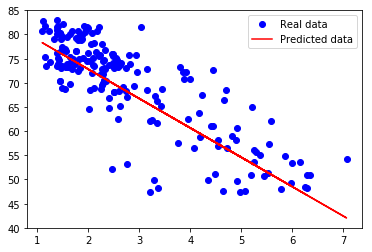

In [47]:
plt.plot(data[:,0], data[:,1], 'bo', label='Real data')
plt.plot(data[:,0], data[:,0]*w_out+b_out, 'r', label='Predicted data')
plt.legend()
plt.show()

## Huber loss

Robust to outliers

If the differences between the predicted value and the real value is small, square it

If it's large, take its absolute value

**tf.cond(pred, fn1, fn2, name=None)**

In [49]:
def huber_loss(lables, predictions, delta=14.0):
    residual = tf.abs(labels - predictions)
    def f1(): return 0.5*tf.square(residual)
    def f2(): return delta*residual - 0.5 * tf.square(delta)
    return tf.cond(residual < delta, f1, f2)

### TF Control Flow

Since TF builds graph before computation, we have to specify all possible subgraphs beforehand.

- `Control Flow Ops: tf.cond, tf.group`

- `Comparison Ops : tf.equal, tf.not_equal, tf.greater`

- `Logical Ops : tf.logical_and, tf.logical_not, tf.logical_or, tf.logical_xor`

- `Debugging Ops : tf.is_infiite, tf.is_inf, tf.is_nan,..`

# 2.tf.data

Instead of doing inference with placeholders and feeding in data later, do inference directly with data.

**tf.data.Dataset**

- `tf.data.Dataset.from_tensor_slices((features, labels))`

- `tf.data.Dataset.from_generator(gen, output_types, output_shape)`

dataset = tf.data.Dataset.from_tensor_slices((data[:,0], data[:,1]))

**tf.data.Iterator**

Placeholder 

Pros : put the data processing outside Tensorflow, making it easy to do in Python

Cons : users often end up processing their data in a single thread and creating data bottleneck that slows exceution down.

In [6]:
dataset = tf.data.Dataset.from_tensor_slices((data[:,0], data[:,1]))

In [4]:
print(dataset.output_types)

(tf.float32, tf.float32)


In [5]:
print(dataset.output_shapes)

(TensorShape([]), TensorShape([]))


In [6]:
print(dataset)

<TensorSliceDataset shapes: ((), ()), types: (tf.float32, tf.float32)>


### Can also create Dataset from files

**tf.data.TextLineDataset(filenames)**

**tf.data.FixedLengthRecordDataset(filenames)**

**tf.data.TFRecordDataset(filenames)**

### tf.data.Iterator

Craete an iterator to iterate through samples in Dataset

- `iterator = dataset.make_one_shot_iterator()`

Iterator through the dataset exactly once. No need to initialization

정확히 한번만 Iteration을 할 수 있는데 초기화가 필요없다.

- `iterator = dataset.make_initializable_iterator()`

Iterates through the dataset as many as we want. Need to initialize with each epoch

원하는 만큼 계속 Iteration을 할 수 있는데 초기화가 필요하다.

In [7]:
iterator = dataset.make_one_shot_iterator()
X, Y = iterator.get_next()

print(type(X))

with tf.Session() as sess:
    print(sess.run([X, Y]))
    print(sess.run([X, Y]))
    print(sess.run([X, Y]))
    

<class 'tensorflow.python.framework.ops.Tensor'>
[1.822, 74.82825]
[3.869, 70.81949]
[3.911, 72.15066]


In [5]:
data[0:3,0]

array([1.822, 3.869, 3.911], dtype=float32)

In [6]:
data[0:3,1]

array([74.82825, 70.81949, 72.15066], dtype=float32)

### Style1

```Python
while True:
    sess.run(iterator.initializer())
    try:
        sess.run([result])
    except tf.errors.OutOfRangeError:
            break

```

In [3]:
tf.reset_default_graph()
data, n_samples = utils.read_birth_life_data(DATA_FILE)
dataset = tf.data.Dataset.from_tensor_slices((data[:,0], data[:,1]))
iterator = dataset.make_initializable_iterator()

# X= tf.placeholder(tf.float32, shape=None, name='x')
# Y = tf.placeholder(tf.float32, shape=None, name='y')

X, Y = iterator.get_next()

w = tf.get_variable(name='w', dtype=None, initializer=tf.constant(0.0))
b = tf.get_variable(name='b', dtype=None, initializer=tf.constant(0.0))

Y_predicted = w*X + b


def huber_loss(labels, predictions, delta=14.0):
    residual = tf.abs(labels - predictions)
    def f1(): return 0.5*tf.square(residual)
    def f2(): return delta*residual - 0.5 * tf.square(delta)
    return tf.cond(residual < delta, f1, f2)

loss = huber_loss(Y, Y_predicted)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)


print(iterator.output_types)

config = tf.ConfigProto()
config.gpu_options.allow_growth = True

with tf.Session(config =config) as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(100):
        sess.run(iterator.initializer)
        total_loss = 0
        while True:
            try:
                _, loss_ = sess.run([optimizer, loss])
                total_loss += loss_
            except tf.errors.OutOfRangeError:
                break
        print('Epoch {0}: {1}'.format(i, total_loss/n_samples))
        # Step 9 :output the values of w and b
        w_out, b_out = sess.run([w, b])
    
    

(tf.float32, tf.float32)
Epoch 0: 712.5349964342619
Epoch 1: 480.17684252550333
Epoch 2: 411.2783675131045
Epoch 3: 381.1438026114514
Epoch 4: 363.965206889867
Epoch 5: 352.0028216342001
Epoch 6: 342.65910039112754
Epoch 7: 334.84100784196664
Epoch 8: 327.9518736341282
Epoch 9: 321.63482000235666
Epoch 10: 315.6941960449968
Epoch 11: 310.0039571509844
Epoch 12: 304.4644903231608
Epoch 13: 299.02843485184405
Epoch 14: 293.6694610852944
Epoch 15: 288.3639351369519
Epoch 16: 283.09333086735325
Epoch 17: 277.85642405654255
Epoch 18: 272.6439196676016
Epoch 19: 267.4467619214795
Epoch 20: 262.2604258420485
Epoch 21: 257.0869437708936
Epoch 22: 251.9340898333877
Epoch 23: 246.7978208001213
Epoch 24: 241.68042055982608
Epoch 25: 236.58248748748417
Epoch 26: 231.5038126934712
Epoch 27: 226.446897909256
Epoch 28: 221.41354965849007
Epoch 29: 216.40121694964014
Epoch 30: 211.41856330033195
Epoch 31: 206.4636707354533
Epoch 32: 201.52567135660271
Epoch 33: 196.60663291278638
Epoch 34: 191.6995161

### Style2

```Python
sess.run(iterator.intializer)
try:
    while True:
        sess.run([result])
        
except tf.errors.OutOfRangeError:
    pass
        
```

In [5]:
tf.reset_default_graph()
data, n_samples = utils.read_birth_life_data(DATA_FILE)
dataset = tf.data.Dataset.from_tensor_slices((data[:,0], data[:,1]))
iterator = dataset.make_initializable_iterator()

# X= tf.placeholder(tf.float32, shape=None, name='x')
# Y = tf.placeholder(tf.float32, shape=None, name='y')

X, Y = iterator.get_next()

w = tf.get_variable(name='w', dtype=None, initializer=tf.constant(0.0))
b = tf.get_variable(name='b', dtype=None, initializer=tf.constant(0.0))

Y_predicted = w*X + b


def huber_loss(labels, predictions, delta=14.0):
    residual = tf.abs(labels - predictions)
    def f1(): return 0.5*tf.square(residual)
    def f2(): return delta*residual - 0.5 * tf.square(delta)
    return tf.cond(residual < delta, f1, f2)

loss = huber_loss(Y, Y_predicted)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)


print(iterator.output_types)

config = tf.ConfigProto()
config.gpu_options.allow_growth = True

with tf.Session(config =config) as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(100):
        sess.run(iterator.initializer)
        total_loss = 0
        try:
            while True:
                _, loss_ = sess.run([optimizer, loss])
                total_loss += loss_
        except tf.errors.OutOfRangeError:
            pass
        print('Epoch {0}: {1}'.format(i, total_loss/n_samples))
        # Step 9 :output the values of w and b
        w_out, b_out = sess.run([w, b])
    
    

(tf.float32, tf.float32)
Epoch 0: 712.5349964342619
Epoch 1: 480.17684252550333
Epoch 2: 411.2783675131045
Epoch 3: 381.1438026114514
Epoch 4: 363.965206889867
Epoch 5: 352.0028216342001
Epoch 6: 342.65910039112754
Epoch 7: 334.84100784196664
Epoch 8: 327.9518736341282
Epoch 9: 321.63482000235666
Epoch 10: 315.6941960449968
Epoch 11: 310.0039571509844
Epoch 12: 304.4644903231608
Epoch 13: 299.02843485184405
Epoch 14: 293.6694610852944
Epoch 15: 288.3639351369519
Epoch 16: 283.09333086735325
Epoch 17: 277.85642405654255
Epoch 18: 272.6439196676016
Epoch 19: 267.4467619214795
Epoch 20: 262.2604258420485
Epoch 21: 257.0869437708936
Epoch 22: 251.9340898333877
Epoch 23: 246.7978208001213
Epoch 24: 241.68042055982608
Epoch 25: 236.58248748748417
Epoch 26: 231.5038126934712
Epoch 27: 226.446897909256
Epoch 28: 221.41354965849007
Epoch 29: 216.40121694964014
Epoch 30: 211.41856330033195
Epoch 31: 206.4636707354533
Epoch 32: 201.52567135660271
Epoch 33: 196.60663291278638
Epoch 34: 191.6995161

## Handling data in Tensorflow

In [4]:
data, n_samples = utils.read_birth_life_data(DATA_FILE)
data

array([[ 1.822   , 74.82825 ],
       [ 3.869   , 70.81949 ],
       [ 3.911   , 72.15066 ],
       [ 5.578   , 61.999855],
       [ 1.579   , 73.92766 ],
       [ 4.229   , 67.465195],
       [ 1.15    , 81.641464],
       [ 3.86    , 72.30639 ],
       [ 3.142   , 68.484314],
       [ 3.951   , 62.44061 ],
       [ 2.16    , 80.70244 ],
       [ 2.141   , 76.30168 ],
       [ 2.002   , 64.662094],
       [ 2.504   , 68.19498 ],
       [ 3.451   , 68.76483 ],
       [ 2.635   , 74.02456 ],
       [ 1.092   , 80.775314],
       [ 2.747   , 67.064   ],
       [ 1.22    , 80.76195 ],
       [ 1.39    , 82.932686],
       [ 2.117   , 68.889656],
       [ 1.108   , 82.87805 ],
       [ 2.47    , 75.99427 ],
       [ 2.09    , 75.07688 ],
       [ 2.668   , 69.22583 ],
       [ 2.022   , 68.53214 ],
       [ 1.598   , 73.273094],
       [ 2.581   , 62.53622 ],
       [ 2.042   , 77.93202 ],
       [ 1.92    , 81.69512 ],
       [ 2.499   , 68.001   ],
       [ 1.94    , 80.402435],
       [

In [9]:
dataset = tf.data.Dataset.from_tensor_slices((data[:,0], data[:,1]))

In [13]:
iterator = dataset.make_one_shot_iterator()
X, Y = iterator.get_next()
with tf.Session() as sess:
    for i in range(100):
        print(sess.run([X, Y]))

[1.822, 74.82825]
[3.869, 70.81949]
[3.911, 72.15066]
[5.578, 61.999855]
[1.579, 73.92766]
[4.229, 67.465195]
[1.15, 81.641464]
[3.86, 72.30639]
[3.142, 68.484314]
[3.951, 62.44061]
[2.16, 80.70244]
[2.141, 76.30168]
[2.002, 64.662094]
[2.504, 68.19498]
[3.451, 68.76483]
[2.635, 74.02456]
[1.092, 80.775314]
[2.747, 67.064]
[1.22, 80.76195]
[1.39, 82.932686]
[2.117, 68.889656]
[1.108, 82.87805]
[2.47, 75.99427]
[2.09, 75.07688]
[2.668, 69.22583]
[2.022, 68.53214]
[1.598, 73.273094]
[2.581, 62.53622]
[2.042, 77.93202]
[1.92, 81.69512]
[2.499, 68.001]
[1.94, 80.402435]
[1.445, 70.27561]
[2.399, 64.86351]
[2.088, 73.696655]
[3.297, 67.2599]
[1.5, 82.24634]
[1.98, 81.45122]
[1.39, 81.62683]
[1.57, 79.42195]
[1.4, 75.1122]
[1.4, 73.936584]
[1.54, 68.80488]
[1.38, 73.458534]
[1.32, 79.02683]
[1.38, 76.24634]
[1.95, 80.99756]
[1.79, 80.70244]
[1.656, 74.3111]
[1.475, 68.90371]
[1.422, 74.61885]
[1.63, 80.08781]
[1.55, 73.268295]
[1.17, 73.482925]
[2.898, 69.36846]
[2.2893, 69.88439]
[2.59, 68.

**dataset.shuffle**

dataset을 섞어줌

In [16]:
dataset = dataset.shuffle(1000)
iterator = dataset.make_one_shot_iterator()
X, Y = iterator.get_next()

with tf.Session() as sess:
    for i in range(100):
        print(sess.run([X, Y]))

[3.297, 67.2599]
[3.86, 72.30639]
[1.764, 79.288536]
[1.44, 80.38293]
[4.651, 66.46707]
[1.148, 75.40044]
[5.063, 47.700657]
[1.87, 79.870735]
[1.8, 72.40875]
[4.718, 56.497074]
[2.09, 75.07688]
[1.87, 79.1]
[4.487, 51.062756]
[3.364, 48.342804]
[2.042, 77.93202]
[1.44, 80.3878]
[2.501, 73.76498]
[1.38, 80.948784]
[2.484, 75.97424]
[2.479, 75.462296]
[1.9856, 76.23683]
[1.39, 79.98781]
[1.22, 80.76195]
[6.288, 48.282196]
[1.47, 72.967316]
[3.869, 70.81949]
[1.95, 80.99756]
[2.405, 73.77405]
[1.94, 80.402435]
[4.072, 56.588707]
[2.313, 74.72261]
[1.79, 80.70244]
[1.476, 79.380394]
[1.677, 80.797806]
[2.002, 64.662094]
[1.63, 80.08781]
[3.451, 68.76483]
[5.238, 56.147587]
[1.598, 73.273094]
[2.022, 68.53214]
[4.193, 58.7151]
[3.139, 72.82593]
[2.59, 68.295364]
[1.475, 68.90371]
[1.38, 76.24634]
[4.819, 58.954075]
[1.896, 75.22212]
[2.1, 73.42968]
[3.8, 73.28966]
[5.287, 55.585587]
[4.912, 49.696926]
[5.578, 61.999855]
[5.85, 54.924194]
[1.67, 72.751854]
[2.07, 80.291954]
[2.1, 78.24146]


**dataset.repeat**

dataset을 반복해서 만듬

In [22]:
dataset = tf.data.Dataset.from_tensor_slices((data[:,0], data[:,1]))
dataset = dataset.repeat(100)
iterator = dataset.make_one_shot_iterator()
X, Y = iterator.get_next()

with tf.Session() as sess:
    for i in range(100 * 10):
        print(sess.run([X, Y]))


[1.822, 74.82825]
[3.869, 70.81949]
[3.911, 72.15066]
[5.578, 61.999855]
[1.579, 73.92766]
[4.229, 67.465195]
[1.15, 81.641464]
[3.86, 72.30639]
[3.142, 68.484314]
[3.951, 62.44061]
[2.16, 80.70244]
[2.141, 76.30168]
[2.002, 64.662094]
[2.504, 68.19498]
[3.451, 68.76483]
[2.635, 74.02456]
[1.092, 80.775314]
[2.747, 67.064]
[1.22, 80.76195]
[1.39, 82.932686]
[2.117, 68.889656]
[1.108, 82.87805]
[2.47, 75.99427]
[2.09, 75.07688]
[2.668, 69.22583]
[2.022, 68.53214]
[1.598, 73.273094]
[2.581, 62.53622]
[2.042, 77.93202]
[1.92, 81.69512]
[2.499, 68.001]
[1.94, 80.402435]
[1.445, 70.27561]
[2.399, 64.86351]
[2.088, 73.696655]
[3.297, 67.2599]
[1.5, 82.24634]
[1.98, 81.45122]
[1.39, 81.62683]
[1.57, 79.42195]
[1.4, 75.1122]
[1.4, 73.936584]
[1.54, 68.80488]
[1.38, 73.458534]
[1.32, 79.02683]
[1.38, 76.24634]
[1.95, 80.99756]
[1.79, 80.70244]
[1.656, 74.3111]
[1.475, 68.90371]
[1.422, 74.61885]
[1.63, 80.08781]
[1.55, 73.268295]
[1.17, 73.482925]
[2.898, 69.36846]
[2.2893, 69.88439]
[2.59, 68.

[2.458, 52.08149]
[6.339, 50.89554]
[4.982, 47.402195]
[2.5, 73.03415]
[4.819, 58.954075]
[5.371, 55.05712]
[5.525, 51.410023]
[7.063, 54.265633]
[3.217, 62.0701]
[4.912, 49.696926]
[1.47, 72.967316]
[4.533, 58.21695]
[6.294, 50.95483]
[5.99, 53.462635]
[4.651, 66.46707]
[5.238, 56.147587]
[3.199, 47.365074]
[4.718, 56.497074]
[5.063, 47.700657]
[5.246, 53.638584]
[4.17, 63.83727]
[3.25, 62.286682]
[4.193, 58.7151]
[4.453, 60.994194]
[5.185, 50.840805]
[5.775, 48.069584]
[4.544, 56.960194]
[4.919, 60.626266]
[5.981, 49.194828]
[4.631, 47.61846]
[2.405, 73.77405]
[4.487, 51.062756]
[4.338, 49.87722]
[5.85, 54.924194]
[2.75, 53.109512]
[5.287, 55.585587]
[5.443, 50.65366]
[1.822, 74.82825]
[3.869, 70.81949]
[3.911, 72.15066]
[5.578, 61.999855]
[1.579, 73.92766]
[4.229, 67.465195]
[1.15, 81.641464]
[3.86, 72.30639]
[3.142, 68.484314]
[3.951, 62.44061]
[2.16, 80.70244]
[2.141, 76.30168]
[2.002, 64.662094]
[2.504, 68.19498]
[3.451, 68.76483]
[2.635, 74.02456]
[1.092, 80.775314]
[2.747, 67.0

**dataset.batch**

In [30]:
dataset = tf.data.Dataset.from_tensor_slices((data[:,0], data[:,1]))
dataset = dataset.batch(128)
iterator = dataset.make_one_shot_iterator()
X, Y = iterator.get_next()

with tf.Session() as sess:
    for i in range(1):
        x,y = sess.run([X, Y])
        print(type(x))
        print(x)
        print(x.shape)
        print(y)

<class 'numpy.ndarray'>
[1.822  3.869  3.911  5.578  1.579  4.229  1.15   3.86   3.142  3.951
 2.16   2.141  2.002  2.504  3.451  2.635  1.092  2.747  1.22   1.39
 2.117  1.108  2.47   2.09   2.668  2.022  1.598  2.581  2.042  1.92
 2.499  1.94   1.445  2.399  2.088  3.297  1.5    1.98   1.39   1.57
 1.4    1.4    1.54   1.38   1.32   1.38   1.95   1.79   1.656  1.475
 1.422  1.63   1.55   1.17   2.898  2.2893 2.59   1.4    2.07   2.2
 1.25   1.44   1.39   1.555  2.     1.87   1.63   1.87   1.49   1.476
 1.46   1.46   1.49   1.148  1.84   1.44   2.3    1.44   1.736  1.536
 1.8    2.49   1.9856 1.639  1.896  2.336  2.064  1.98   1.797  2.501
 2.954  2.484  2.622  2.32   2.329  3.139  3.34   2.262  3.983  2.235
 2.25   2.479  2.58   1.467  1.848  2.1    1.862  1.83   3.348  2.79
 1.551  1.699  2.211  5.2    4.453  1.749  2.04   2.934  2.811  2.271
 2.309  2.279  1.38   2.564  1.8    2.295  3.8    3.03  ]
(128,)
[74.82825  70.81949  72.15066  61.999855 73.92766  67.465195 81.641464
 72.30

**dataset.map**

In [35]:
dataset = tf.data.Dataset.from_tensor_slices((data[:,0], data[:,1]))
dataset = dataset.map(lambda x: tf.one_hot(x, 10))
iterator = dataset.make_one_shot_iterator()

X,Y = iterator.get_next()

with tf.Session() as sess:
    for i in range(100):
        print(sess.run([X, Y]))

TypeError: <lambda>() takes 1 positional argument but 2 were given

## Should we always use tf.data?

* For prototyping, feed dict can be faster and easier to write

* tf.data is tricky to use when you have complicated preprocessing or multiple data sources

* NLP data is noramlly just a sequence of intengers. In this case, transferring the data over to GPU is pretty quick, so the speedup of tf.data isn't that large

# 3.Optimizers

Session looks at all **trainable variables** that loss depends on and update them

## Trainable variables

Specify aif a variable should be trained or not,
In double q-learning, you want to alternate which q-value functions to update

`tf.Variable(initial_value=None, trainable=True)`

## Optimizers

Advanced optimizers work better when tuned, but are generally harder to tune.

Kingma show that its bias-correction helps Adam slightly outperform RMSprop towards the end of optimization as gradients become sparser.

# 4.Logistic Regression

Y are one-hot vector

Inference : Y_predicted = softmax(X*w + b)

Cross entropy loss  : -log(Y_predicted)

In [1]:
tf.reset_default_graph()

NameError: name 'tf' is not defined

In [1]:
import os
import time

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

import utils

DATA_FILE = './birth_life_2010.txt'

In [2]:
# Define parameter for the model
learning_rate = 0.01
batch_size = 128
n_epochs = 30
n_train = 60000
n_test = 10000

In [3]:
# Step1 : Read in data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('/data/mnist', one_hot=True)

Instructions for updating:
Use the retry module or similar alternatives.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /data/mnist\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /data/mnist\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /data/mnist\t10k-images-idx3-ubyte.gz
Extracting /data/mnist\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
# Step 2: Create placeholder for features and labels
# each image is represented with a 1x784 tensor
X = tf.placeholder(tf.float32, [batch_size, 784], name='X_placeholder')
Y = tf.placeholder(tf.int32, [batch_size, 10], name='Y_placeholder')

In [5]:
# Step 3: create weights and bias
w = tf.Variable(tf.random_normal(shape=[784, 10], stddev=0.01), name='weights')
b = tf.Variable(tf.zeros([1, 10], name='bais'))

In [6]:
# Step 4: build model
logits = tf.matmul(X, w) + b

In [7]:
# Step 5: define loss function
# use cross entropy of softmax of logits as the loss function
entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y, name='loss')
# compute the mean over all the examples in the batch
loss = tf.reduce_mean(entropy)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



In [8]:
# Step 6. define training op
# using gradient descent with learning rate of 0.01 to minimize loss
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)

In [10]:
sess_config = tf.ConfigProto(gpu_options=tf.GPUOptions(allow_growth=True))

with tf.Session(config=sess_config) as sess:
    writer = tf.summary.FileWriter('./graphs/logistic_reg', sess.graph)
    
    start_time = time.time()
    sess.run(tf.global_variables_initializer())
    n_batches = int(mnist.train.num_examples/batch_size)
    for i in range(n_epochs):
        total_loss = 0
        
        for _ in range(n_batches):
            X_batch, Y_batch = mnist.train.next_batch(batch_size)
            _, loss_batch = sess.run([optimizer, loss], feed_dict={X: X_batch, Y:Y_batch})
            total_loss += loss_batch
            
        print('Average loss epoch {0}: {1}'.format(i, total_loss/n_batches))
        
    print('Total time: {0} seconds'.format(time.time() - start_time))
    
    preds = tf.nn.softmax(logits)
    correct_preds = tf.equal(tf.argmax(preds,1), tf.argmax(Y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_preds, tf.float32))
    
    n_batches = int(mnist.test.num_examples/batch_size)
    total_correct_preds = 0
    
    
    for i in range(n_batches):
        X_batch, Y_batch = mnist.test.next_batch(batch_size)
        accuracy_batch = sess.run(accuracy, feed_dict={X: X_batch, Y:Y_batch})
        total_correct_preds += accuracy_batch
        
    print('Accuracy {0}'.format(total_correct_preds/mnist.test.num_examples))
    
    writer.close()
    

Average loss epoch 0: 0.3668923990362452
Average loss epoch 1: 0.29197537907700993
Average loss epoch 2: 0.288578315145208
Average loss epoch 3: 0.2779807690140251
Average loss epoch 4: 0.27164025085441995
Average loss epoch 5: 0.2716409575307008
Average loss epoch 6: 0.27066237960523104
Average loss epoch 7: 0.2718017105629672
Average loss epoch 8: 0.26546696114998597
Average loss epoch 9: 0.26620330996724556
Average loss epoch 10: 0.2627633216254639
Average loss epoch 11: 0.2620634049750291
Average loss epoch 12: 0.26336513008132123
Average loss epoch 13: 0.25907011766047466
Average loss epoch 14: 0.2605843072917773
Average loss epoch 15: 0.26021302776250527
Average loss epoch 16: 0.2581083356361567
Average loss epoch 17: 0.2561597439063179
Average loss epoch 18: 0.2595723558451746
Average loss epoch 19: 0.25346415804260536
Average loss epoch 20: 0.258368986990902
Average loss epoch 21: 0.2538311272894308
Average loss epoch 22: 0.25271753350268433
Average loss epoch 23: 0.25572791198